# 🚴‍♀️ Europe Bike Sales Analysis Project

This project is an exploratory analysis of bike sales data across Europe. The main goal is to uncover trends and patterns related to customer demographics, product categories, geographic regions, and key sales metrics such as revenue, profit, and quantity sold.

The dataset used in this analysis was obtained from [Kaggle](https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe/data) and contains detailed transaction-level information about bike-related products, customer profiles, and sales performance.

## 📊 Dataset Overview

The dataset includes the following columns:

- **Date**: The full date of the transaction (YYYY-MM-DD format).
- **Day**: The day of the month the transaction occurred.
- **Month**: The name of the month the transaction occurred.
- **Year**: The year the transaction occurred.
- **Customer_Age**: Age of the customer at the time of purchase.
- **Age_Group**: Age category of the customer (e.g., Youth (<25), Adults (25–49), Seniors (50+)).
- **Customer_Gender**: Gender of the customer (M or F).
- **Country**: Country where the transaction occurred.
- **State**: State or region within the country.
- **Product_Category**: High-level category of the product (e.g., Bikes, Accessories, Clothing).
- **Sub_Category**: More specific category under the product category (e.g., Helmets, Tires, Jerseys).
- **Product**: The name of the product purchased.
- **Order_Quantity**: Number of units ordered.
- **Unit_Cost**: Cost per unit of the product.
- **Unit_Price**: Sale price per unit of the product.
- **Profit**: Total profit from the transaction.
- **Cost**: Total cost for the transaction (Order_Quantity × Unit_Cost).
- **Revenue**: Total revenue from the transaction (Order_Quantity × Unit_Price).


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
import geopandas as gpd

sns.set_style("whitegrid")  # Options: white, dark, whitegrid, darkgrid, ticks
palette = sns.color_palette("Set2")  # Options: deep, muted, bright, pastel, dark, colorblind, or custom palettes
sns.set_palette(palette)
plt.style.use("seaborn-v0_8-whitegrid")  # You can try 'ggplot', 'fivethirtyeight', etc.


In [2]:
df = pd.read_csv('../data/sales_data.csv')

In [3]:
df.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
df.describe()

Day           Year   Customer_Age  Order_Quantity  \
count  113036.000000  113036.000000  113036.000000   113036.000000   
mean       15.665753    2014.401739      35.919212       11.901660   
std         8.781567       1.272510      11.021936        9.561857   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113036.000000  113036.000000  113036.000000  113036.000000   
mean      267.296366     452.938427     285.051665     469.318695   
std       549.835483     922.071219     453.887443     884.866118   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000       5.000000      29.000000      28.000000   
50%         9.000000      24.000000     101.000000     108.000000   
75%        42.000000      70.000000     358.000000     432.000000   
max      2171.000000    3578.000000   15096.000000   42978.000000   

             Revenue  
count  113036.000000  
mean      754.370360  
std      1309.094674  
min         2.000000  
25%        63.000000  
50%       223.000000  
75%       800.000000  
max     58074.000000

In [6]:
#Rename columns
df.columns = [col.lower() for col in df.columns]

In [7]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              113036 non-null  datetime64[ns]
 1   day               113036 non-null  int64         
 2   month             113036 non-null  object        
 3   year              113036 non-null  int64         
 4   customer_age      113036 non-null  int64         
 5   age_group         113036 non-null  object        
 6   customer_gender   113036 non-null  object        
 7   country           113036 non-null  object        
 8   state             113036 non-null  object        
 9   product_category  113036 non-null  object        
 10  sub_category      113036 non-null  object        
 11  product           113036 non-null  object        
 12  order_quantity    113036 non-null  int64         
 13  unit_cost         113036 non-null  int64         
 14  unit

## 2 - Sales over time

In [9]:
daily_sales = df[['date','order_quantity']].groupby('date').sum()

In [10]:
# Lets apply a moving average to smooth the sales data
daily_sales['moving_average_30d'] = daily_sales.rolling(window="30D").mean()

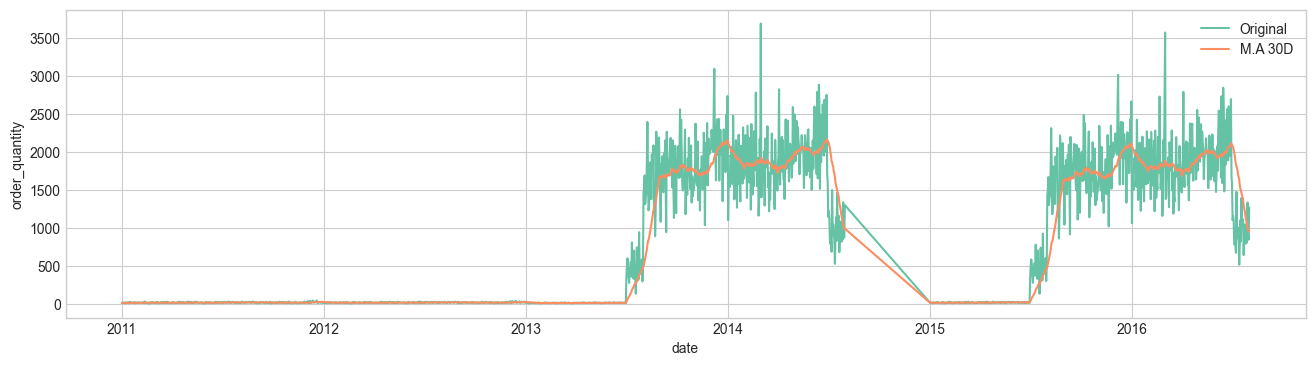

In [11]:
plt.figure(figsize = (16,4))
sns.lineplot(data = daily_sales, x = 'date', y='order_quantity', label = 'Original')
sns.lineplot(data = daily_sales, x = 'date', y='moving_average_30d', label = 'M.A 30D')
plt.show()

- Começo dos anos possuia poucas vendas. Em 2013 a empresa cresceu, se mantendo ativa até meados de 2014, decaindo pra quase zero em 2015 e voltando a escalar no segundo semestre.
- Dúvida: O que aconteceu no segundo semestre de 2014 para termos esse vazio nos dados?
- Parece existir um padrão sazonal nos anos de 2013 e 2015, com uma trend muito parecida (analisando as médias móveis de 30 dias)

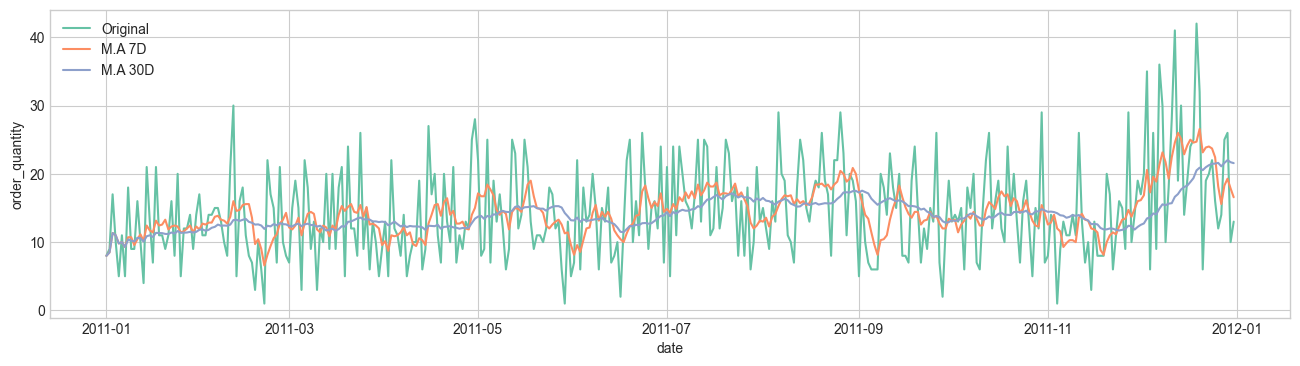

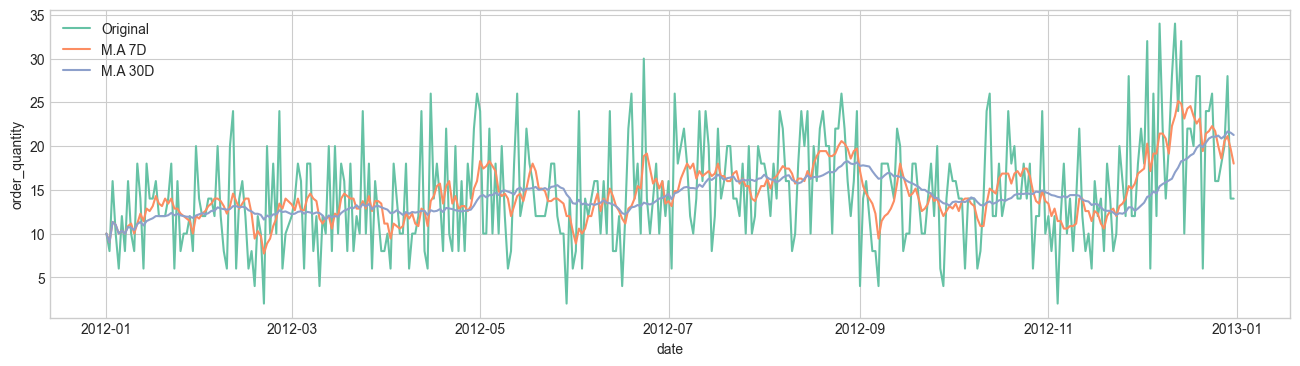

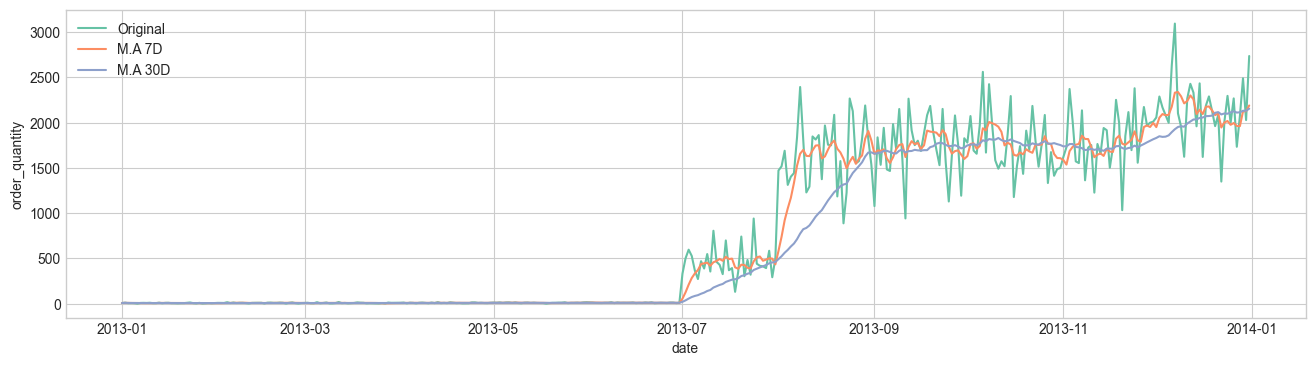

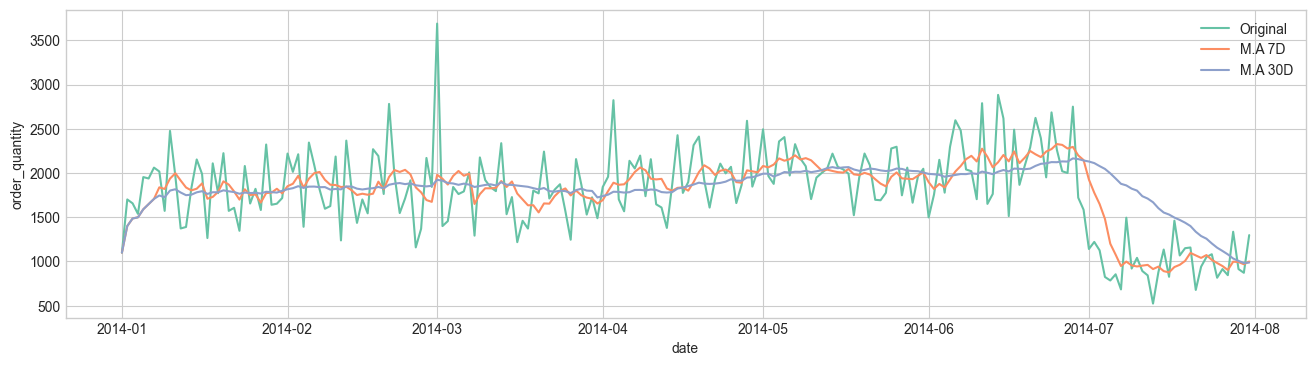

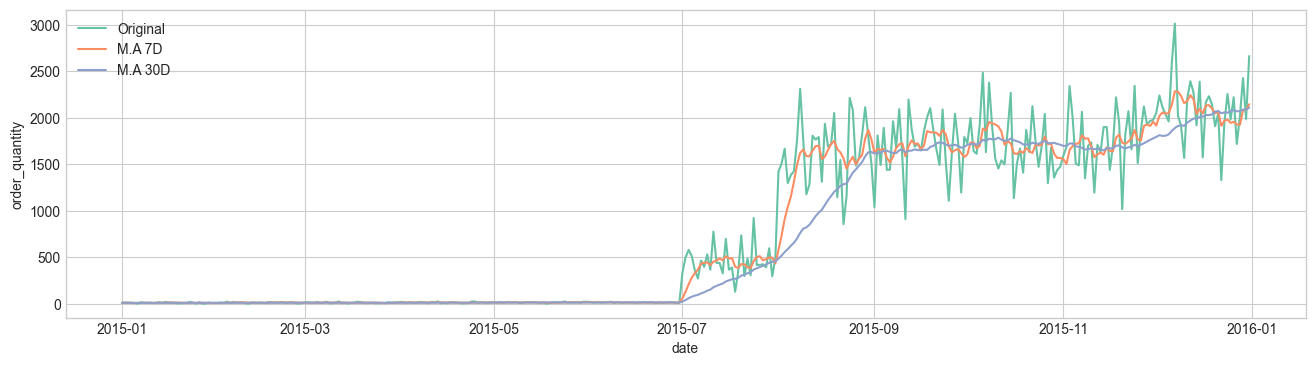

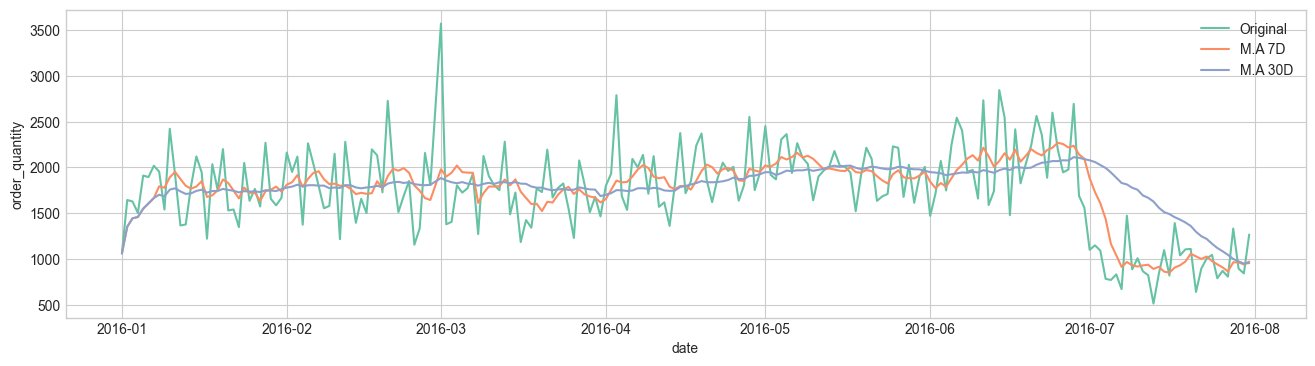

In [13]:
years = np.sort(df['year'].unique())

for year in years:
    df_year = df[df['year']==year]
    daily_sales_year = df_year[['date','order_quantity']].groupby('date').sum()
    daily_sales_year['moving_average_7d'] = daily_sales_year['order_quantity'].rolling(window="7D").mean()
    daily_sales_year['moving_average_30d'] = daily_sales_year['order_quantity'].rolling(window="30D").mean()
    plt.figure(figsize = (16,4))
    sns.lineplot(data = daily_sales_year, x = 'date', y='order_quantity', label = 'Original')
    sns.lineplot(data = daily_sales_year, x = 'date', y='moving_average_7d', label = 'M.A 7D')
    sns.lineplot(data = daily_sales_year, x = 'date', y='moving_average_30d', label = 'M.A 30D')
    plt.show()

## Summary
- 2011 parece muito com 2012
- Intensa subida em julho de 2013
- 2014 começou bem, mas agosto até final do ano não tem dados. O que aconteceu?
- 2015 teve crescimento muito parecido com 2013
- 2016 começou forte, com uma intensa queda em julho.
- Parece haver uma alta sazonalidade nos dados, mas devemos avaliar

## Questions:
- Porque tem falta de dados em 2014?
- Por que em 2016 e 2014 a queda aconteceu em julho, enquanto que pra 2013 e 2015 foi justamente o contrário

### Sazonalidade

In [14]:
df['month'] = df['date'].dt.month

monthly = df.groupby(['year', 'month'])['order_quantity'].sum().reset_index()

final_stats = monthly.groupby('month')['order_quantity'].agg(['mean', 'sum']).reset_index()

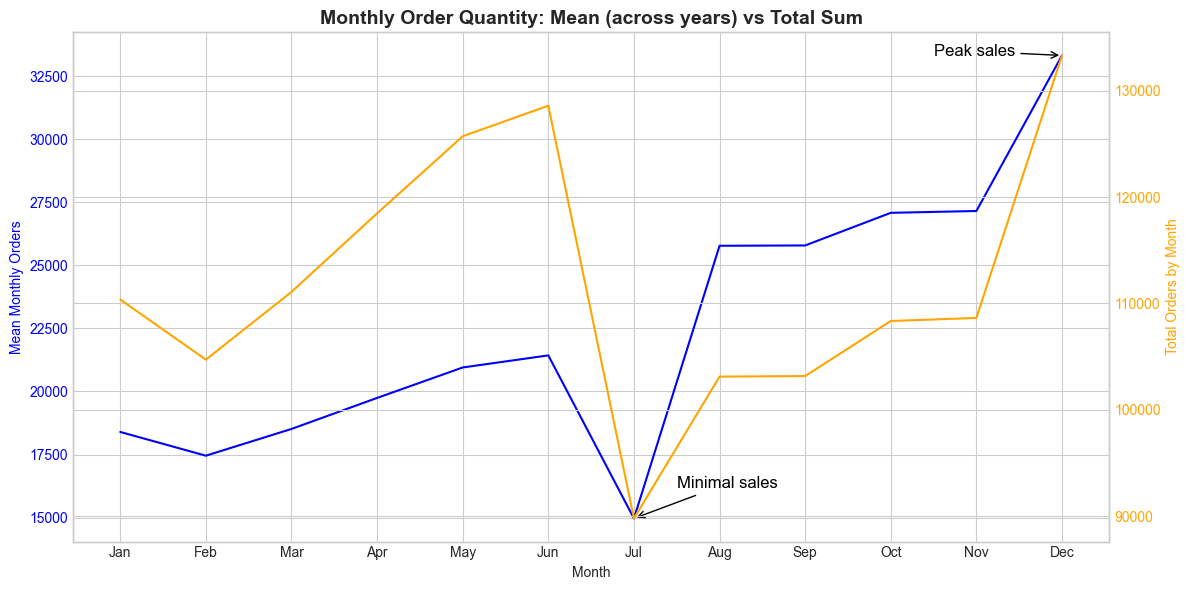

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=final_stats, x='month', y='mean', ax=ax1, color='blue')
ax1.set_ylabel('Mean Monthly Orders', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(data=final_stats, x='month', y='sum', ax=ax2, color='orange')
ax2.set_ylabel('Total Orders by Month', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.set_title('Monthly Order Quantity: Mean (across years) vs Total Sum', fontsize = 14, fontweight = 'bold')
ax1.set_xlabel('Month')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


ax1.annotate(
    'Minimal sales',
    xy=(7, final_stats.loc[final_stats['month'] == 7, 'mean'].values[0]),
    xytext=(7.5, final_stats['mean'].min() + 1200),
    arrowprops=dict(arrowstyle='->', color='black'),
    color='black',
    fontsize = 12
)

ax1.annotate(
    'Peak sales',
    xy=(12, final_stats.loc[final_stats['month'] == 12, 'mean'].values[0]),
    xytext=(10.5, final_stats['mean'].max() - 9),
    arrowprops=dict(arrowstyle='->', color='black'),
    color='black',
    fontsize = 12
)

fig.tight_layout()
plt.show()


- Julho é um período de grande queda. Algum motivo? Podemos movimentar ações de marketing.
- Mês de agosto até novembr tiveram uma soma total menor que os meses de abril à junho. Mas isso provavelmente se deu devido aos dados faltantes de 2014. Analisando as médias, nota-se que o segundo semestre é bem mais forte em vendas.
- Apice de vendas em dezembro

C:\Users\giode\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


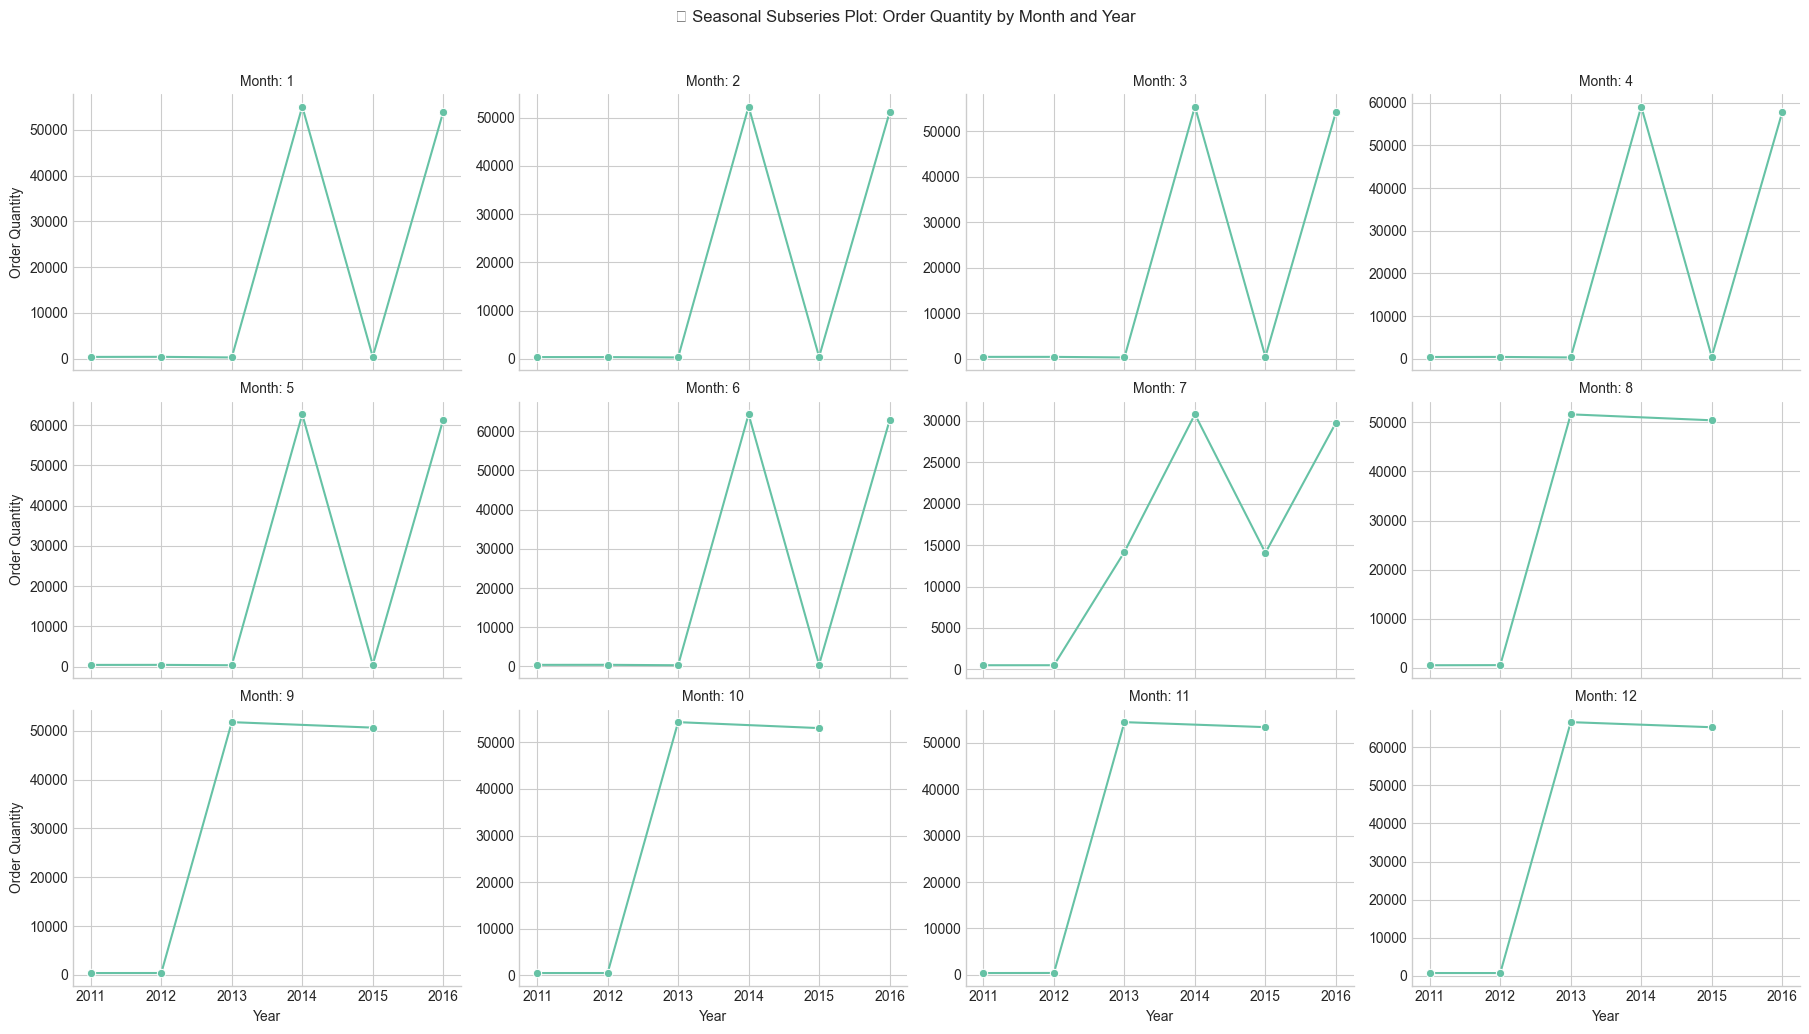

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with monthly sums by year
monthly_by_year = df.groupby(['year', 'month'])['order_quantity'].sum().reset_index()

# Set up the FacetGrid: 12 subplots (one for each month)
g = sns.FacetGrid(monthly_by_year, col='month', col_wrap=4, height=3.5, aspect=1.3, sharey=False)

# Lineplot of value across years per month
g.map(sns.lineplot, 'year', 'order_quantity', marker='o')

# Title and layout
g.set_titles('Month: {col_name}')
g.set_axis_labels('Year', 'Order Quantity')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('📆 Seasonal Subseries Plot: Order Quantity by Month and Year')
plt.show()


C:\Users\giode\AppData\Local\Temp\ipykernel_26776\1242936050.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\giode\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


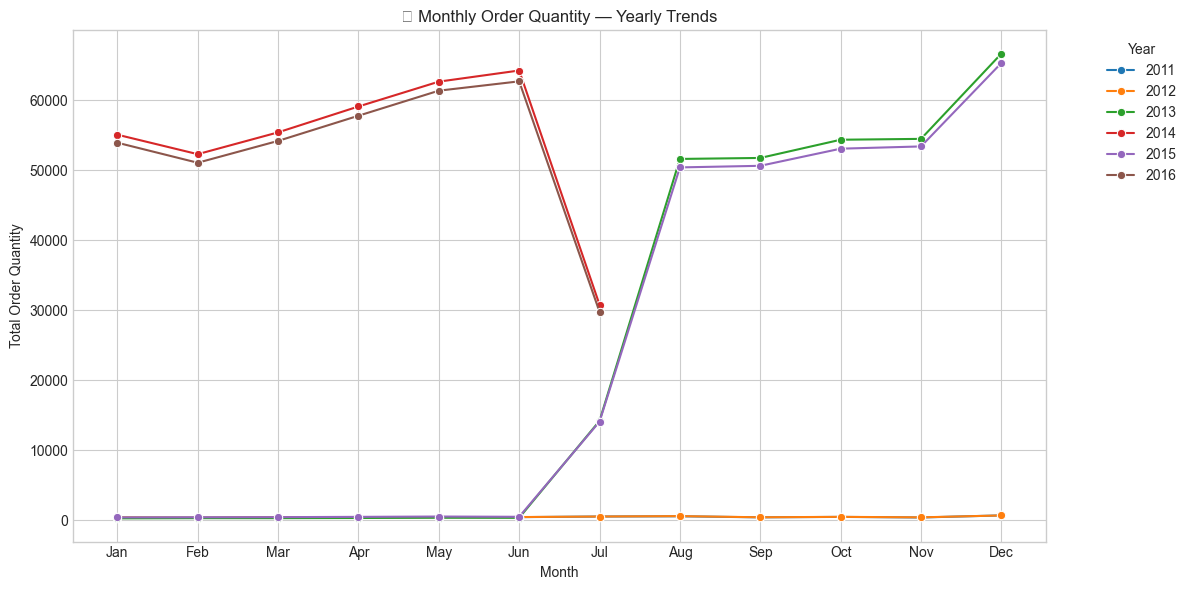

In [17]:
# Same monthly sums by year and month
monthly_by_year = df.groupby(['year', 'month'])['order_quantity'].sum().reset_index()

# Lineplot: x = month, hue = year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_by_year, x='month', y='order_quantity', hue='year', palette='tab10', marker='o')

# Formatting
plt.title('📈 Monthly Order Quantity — Yearly Trends')
plt.xlabel('Month')
plt.ylabel('Total Order Quantity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Client profile

In [18]:
df['customer_age'].describe()

count    113036.000000
mean         35.919212
std          11.021936
min          17.000000
25%          28.000000
50%          35.000000
75%          43.000000
max          87.000000
Name: customer_age, dtype: float64

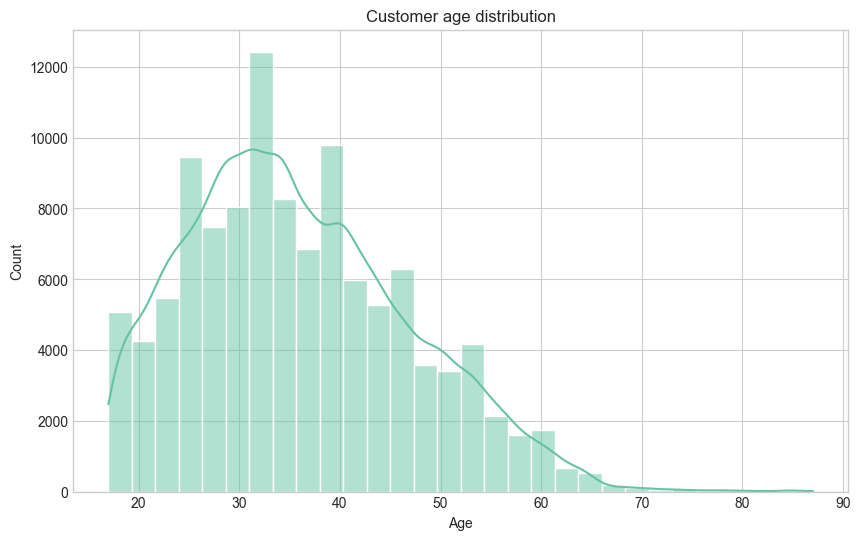

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=30, kde=True)
plt.title('Customer age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

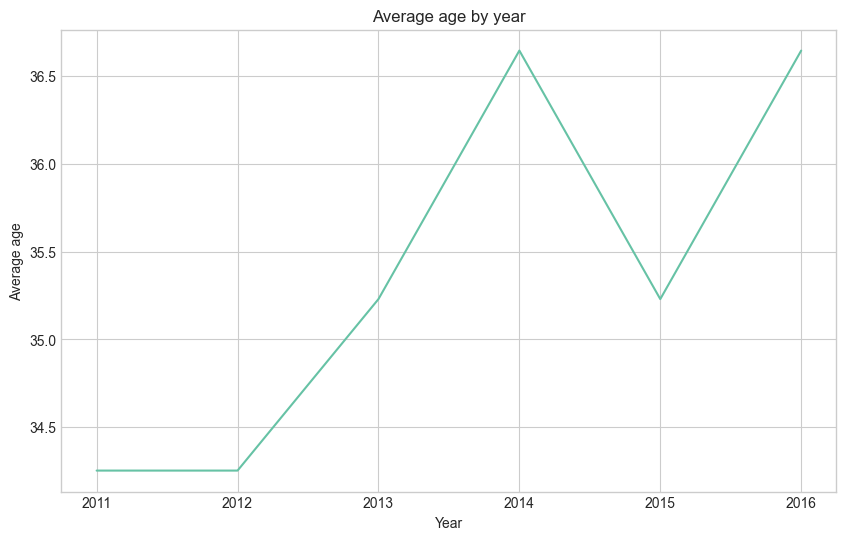

In [43]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby('year')['customer_age'].mean().reset_index(), x='year', y='customer_age')
plt.title('Average age by year')
plt.ylabel('Average age')
plt.xlabel('Year')
plt.show()

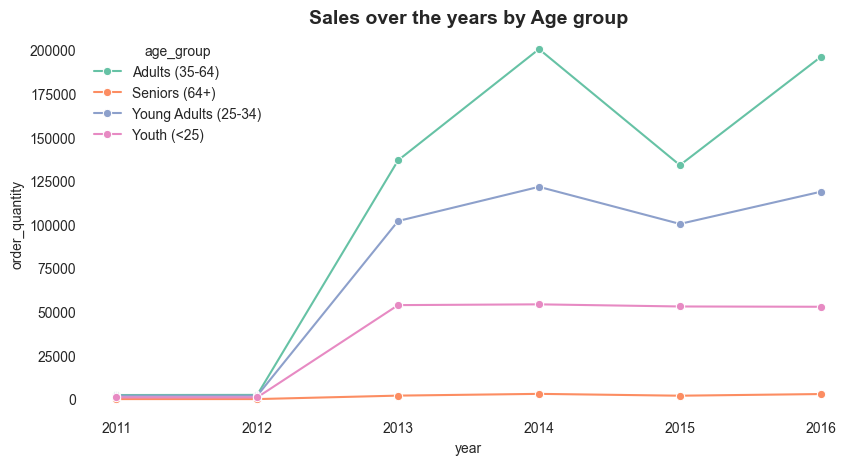

In [48]:
sales_year_age = df.groupby(['year','age_group'])[['order_quantity']].sum().reset_index()
fig = plt.figure(figsize=(10,5))
sns.lineplot(data = sales_year_age, x = 'year', y = 'order_quantity', hue = 'age_group', marker = 'o')
plt.title('Sales over the years by Age group', fontsize = 14, fontweight = 'bold')
plt.grid(False)
plt.box(False)
plt.show()

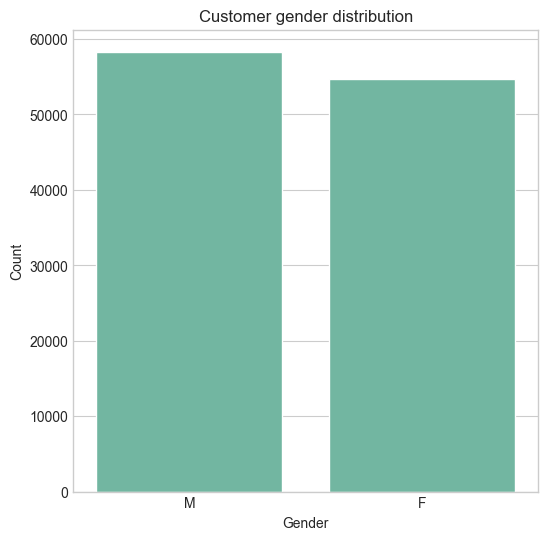

In [21]:
plt.figure(figsize=(6, 6))
sns.countplot(x='customer_gender', data=df)
plt.title('Customer gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

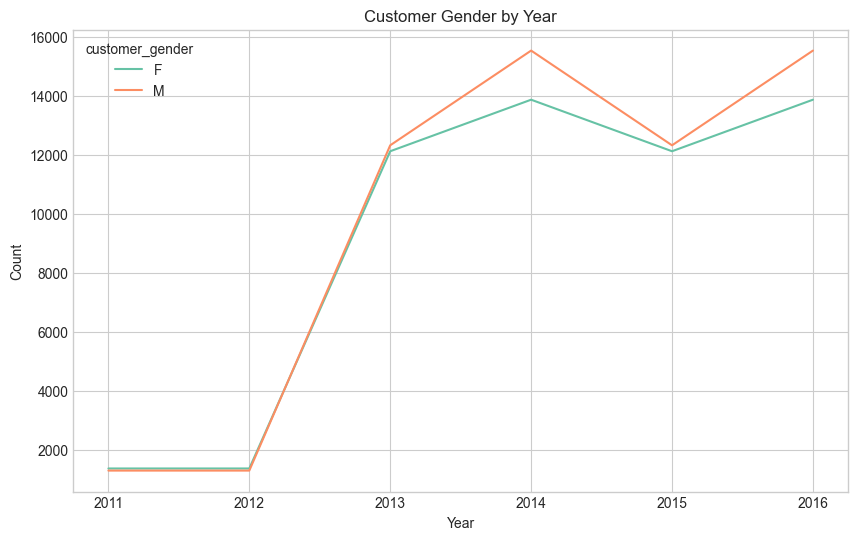

In [44]:
gender_year = df.groupby(['year', 'customer_gender']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_year, x='year', y='count', hue='customer_gender')
plt.title('Customer Gender by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()


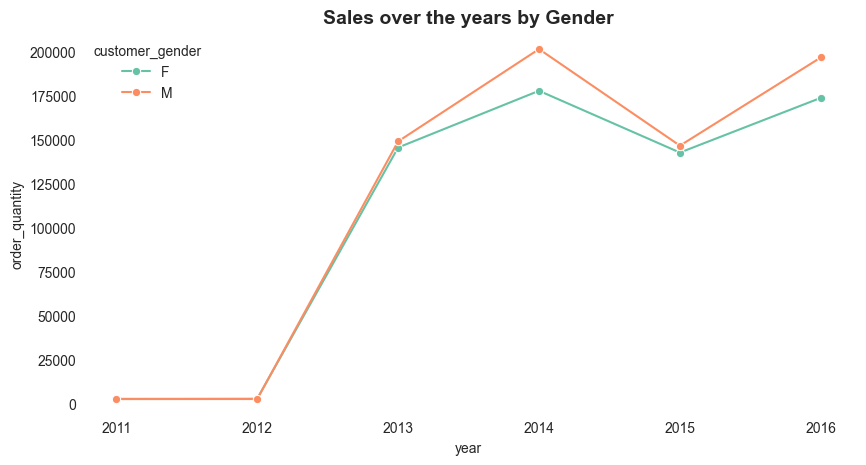

In [49]:
sales_year_age = df.groupby(['year','customer_gender'])[['order_quantity']].sum().reset_index()
fig = plt.figure(figsize=(10,5))
sns.lineplot(data = sales_year_age, x = 'year', y = 'order_quantity', hue = 'customer_gender', marker = 'o')
plt.title('Sales over the years by Gender', fontsize = 14, fontweight = 'bold')
plt.grid(False)
plt.box(False)
plt.show()

## Sales over countries

In [47]:
df.groupby('country')[['order_quantity']].sum().sort_values(by = 'order_quantity', ascending = False)

order_quantity
country                       
United States           477539
Australia               263585
Canada                  192259
United Kingdom          157218
France                  128995
Germany                 125720

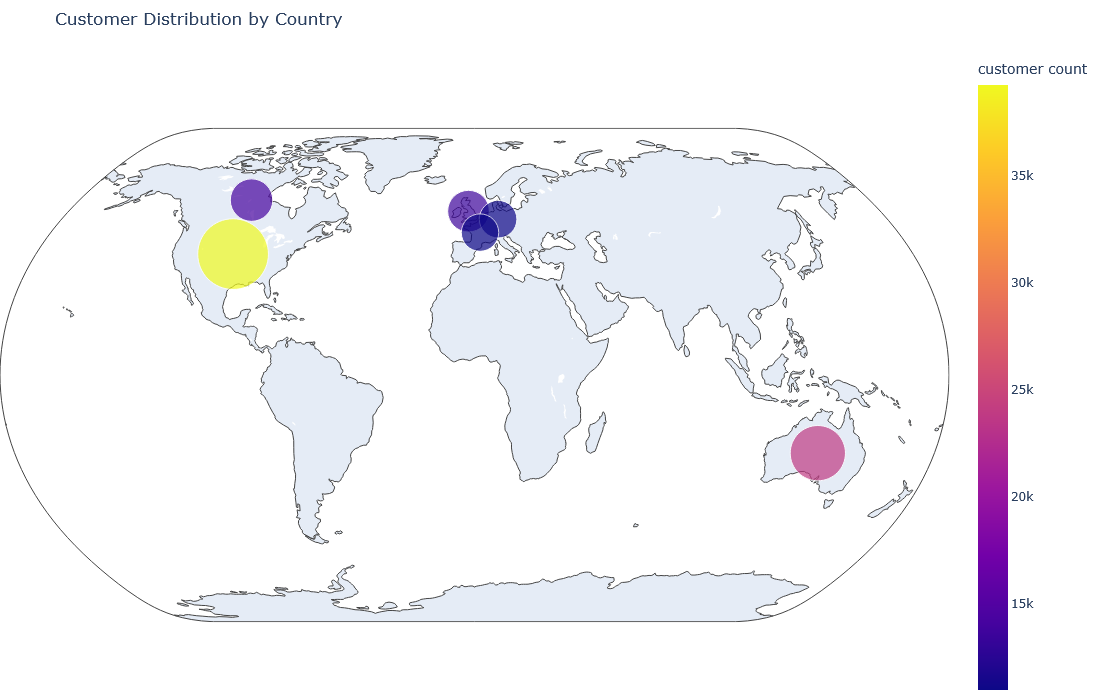

In [23]:

# Grouping customers per country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'customer count']

# Get ISO alpha-3 codes
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

country_counts['iso_alpha'] = country_counts['country'].apply(get_iso3)

# Drop missing ISO codes (if any)
country_counts = country_counts.dropna(subset=['iso_alpha'])

# Bubble map
fig = px.scatter_geo(country_counts,
                     locations="iso_alpha",
                     hover_name="country",
                     size="customer count",
                     color="customer count",
                     projection="natural earth",
                     title="Customer Distribution by Country",
                     color_continuous_scale="Plasma",
                     size_max=50)

# Update layout for a bigger image
fig.update_layout(
    height=700,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


C:\Users\giode\anaconda3\lib\site-packages\seaborn\distributions.py:413: UserWarning:

`bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.



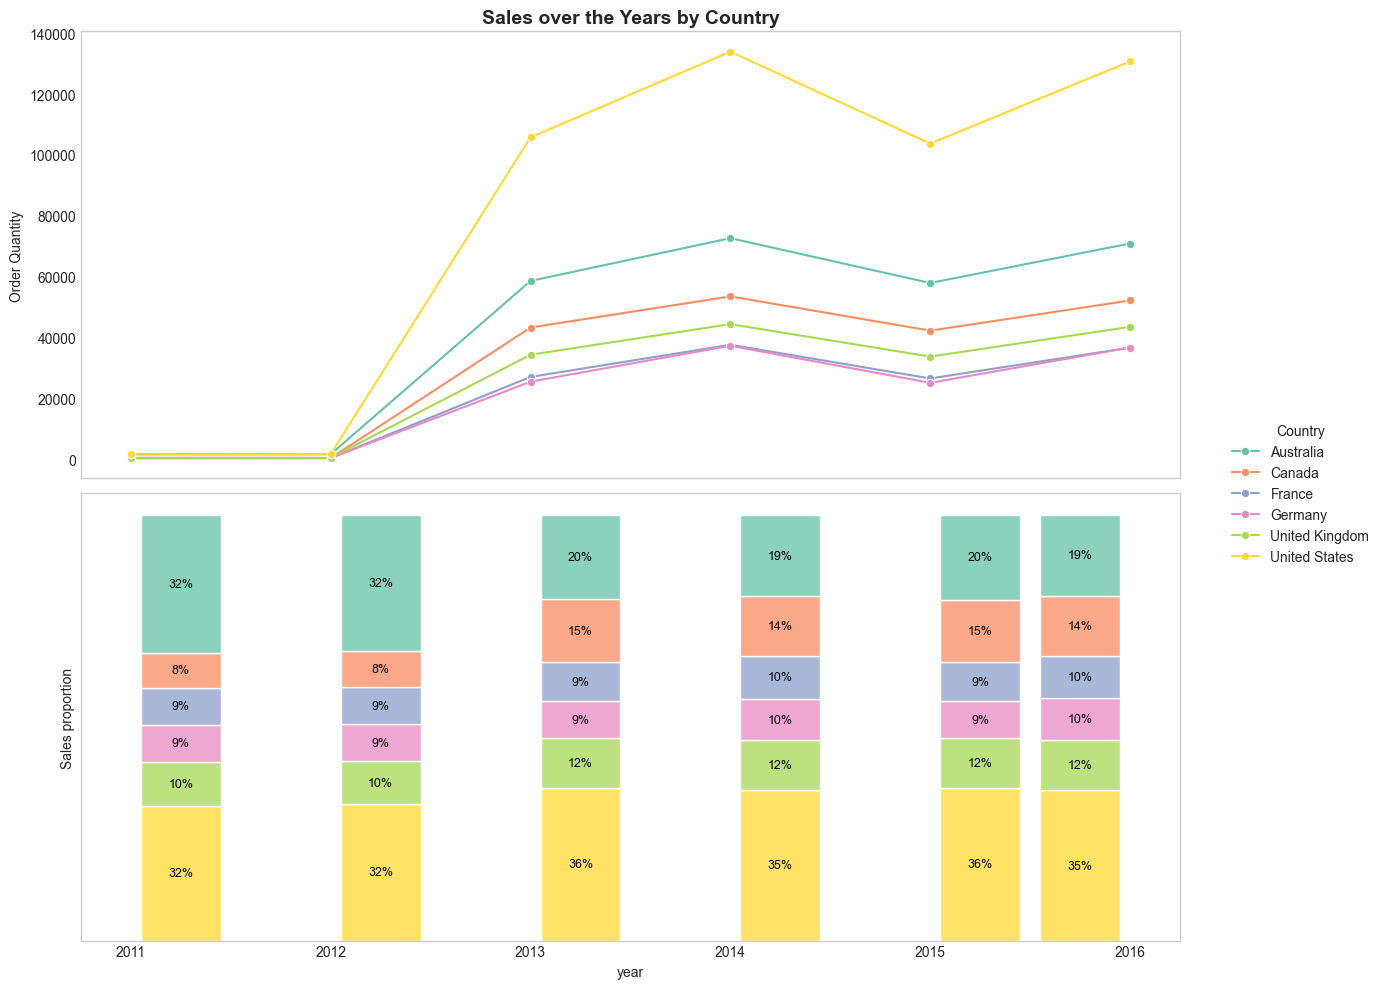

In [69]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10), 
                        sharex=True)

sns.lineplot(
    data=sales_year_country,
    x='year',
    y='order_quantity',
    hue='country',
    marker='o',
    ax=axs[0],
    legend=True
)
axs[0].set_title('Sales over the Years by Country', fontsize=14, fontweight='bold')
axs[0].grid(False)
axs[0].set_ylabel('Order Quantity')

fig.canvas.draw()

handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend_.remove()

sns.histplot(
    data=sales_prop,
    x='year',
    weights='proportion',
    hue='country',
    multiple='stack',
    shrink=0.8,
    ax=axs[1],
    legend=False
)
axs[1].set_ylabel('Sales proportion')
axs[1].grid(False)
axs[1].set_yticks([])
for container in axs[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axs[1].annotate(
                f'{height:.0%}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )

# --- Legenda fora ---
fig.legend(handles, labels, title='Country', loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout()
plt.show()